In [1]:
# handling colab problem
import os
if not 'data' in os.listdir('..'):
    print('needs data folder. imports through git')
    !git clone https://github.com/JakartaLaw/speciale.git
    print(os.listdir())
    os.chdir('speciale//src')

In [2]:
from environments import EnvironmentModel1 as Environment
from environments import translate_action_model1 as translate_action
from environments import reward_scaler_model1 as reward_scaler
from environments import STATES_MU1, STATES_SIGMA1
from environments.model1 import scale_states

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [4]:
from agents.new_dqnagent import Agent

Using TensorFlow backend.


In [5]:
parameters = {
    'beta_L' : 1,
    'sigma_epsilon' : 0.1, 
    'S_min': 120.0,
    'alpha': 4.609,
    'eta_G': 0.164,
    'eta_G_sq' : 0.015,
    'delta': 0.209,
    'sigma_epsilon': 15.11,
    'omega': 3.5,
}

In [6]:
env = Environment(**parameters)
lr = 0.0005
agent = Agent(gamma=0.99, epsilon=1.0, alpha=lr, input_dims=5,
              n_actions=4, mem_size=1000000, batch_size=64, epsilon_dec=0.9999,
              epsilon_end=0.01, state_scaler_mu = STATES_MU1,
              state_scaler_sigma = STATES_SIGMA1)


In [7]:
def draw_beta_L(beta_L_min=0.2, beta_L_max=6.0):
    return np.random.uniform(beta_L_min, beta_L_max)

def transform_action(dqn_action):
    return np.array([0, 25, 37, 45])[dqn_action]

def create_return_array(state, _action, scaled_reward, episode):
    return np.append(state, [_action, scaled_reward, episode])

In [8]:
N_EPISODES = 3000

Episode: 0 epsilon: 1.0


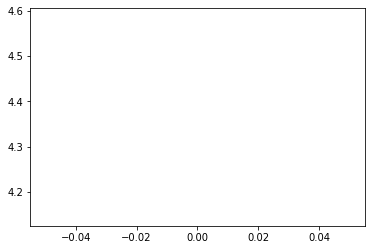

Episode: 10 epsilon: 0.9640599185586783
Episode: 20 epsilon: 0.9234819910736651
Episode: 30 epsilon: 0.8846120157265657
Episode: 40 epsilon: 0.847378103668288
Episode: 50 epsilon: 0.811711391899535


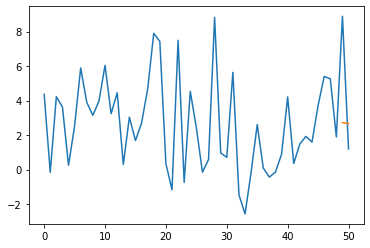

Episode: 60 epsilon: 0.7775459159107581
Episode: 70 epsilon: 0.7448184876827848
Episode: 80 epsilon: 0.713468578822478
Episode: 90 epsilon: 0.6834382086172971
Episode: 100 epsilon: 0.6546718368017131


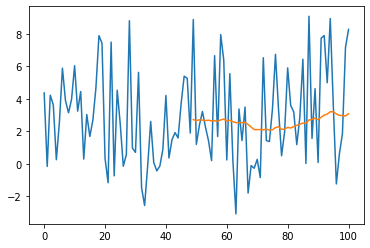

Episode: 110 epsilon: 0.6271162608371637
Episode: 120 epsilon: 0.600720517515557
Episode: 130 epsilon: 0.5754357887043543
Episode: 140 epsilon: 0.5512153110589036
Episode: 150 epsilon: 0.5280142895350369


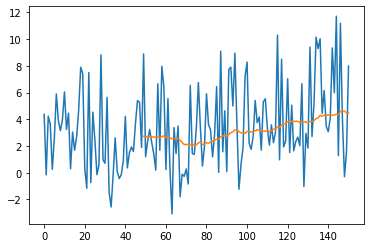

Episode: 160 epsilon: 0.5057898145419926
Episode: 170 epsilon: 0.484500782582415
Episode: 180 epsilon: 0.46410782023267466
Episode: 190 epsilon: 0.4445732113229038
Episode: 200 epsilon: 0.4258608271820816


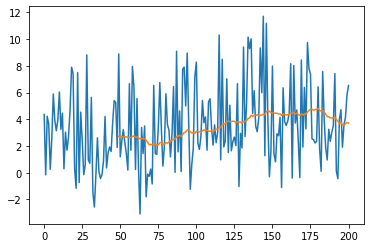

Episode: 210 epsilon: 0.4079360598191387
Episode: 220 epsilon: 0.3907657579165237
Episode: 230 epsilon: 0.3743181655178378
Episode: 240 epsilon: 0.3585628632961515
Episode: 250 epsilon: 0.3434707122943729


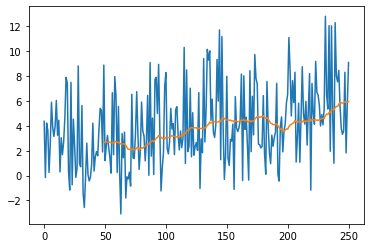

Episode: 260 epsilon: 0.3290138000336249
Episode: 270 epsilon: 0.3151653888899552
Episode: 280 epsilon: 0.3018998666439078
Episode: 290 epsilon: 0.2891926991114924
Episode: 300 epsilon: 0.2770203847689501


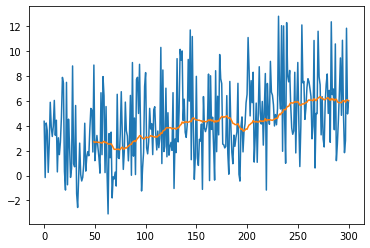

Episode: 310 epsilon: 0.2653604112873939
Episode: 320 epsilon: 0.2541912138969337
Episode: 330 epsilon: 0.24349213550328125
Episode: 340 epsilon: 0.23324338848308065
Episode: 350 epsilon: 0.22342601808729118


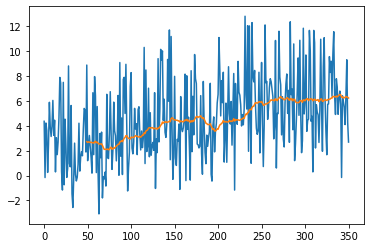

Episode: 360 epsilon: 0.21402186738495152
Episode: 370 epsilon: 0.20501354368248126
Episode: 380 epsilon: 0.19638438635641947
Episode: 390 epsilon: 0.18811843604010126
Episode: 400 epsilon: 0.180200405107292


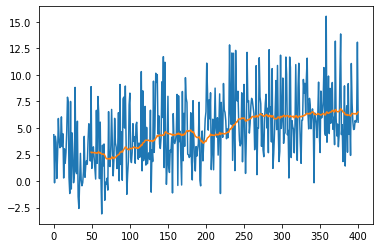

Episode: 410 epsilon: 0.17261564939817997
Episode: 420 epsilon: 0.16535014113544708
Episode: 430 epsilon: 0.1583904429803137
Episode: 440 epsilon: 0.15172368318058757
Episode: 450 epsilon: 0.14533753176474418


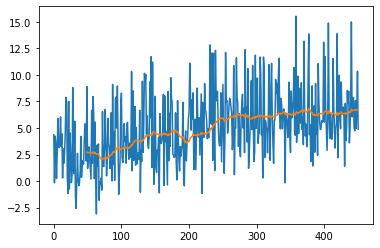

Episode: 460 epsilon: 0.13922017773801795
Episode: 470 epsilon: 0.13336030723831901
Episode: 480 epsilon: 0.12774708261159037
Episode: 490 epsilon: 0.12237012236789019
Episode: 500 epsilon: 0.11721948198113886


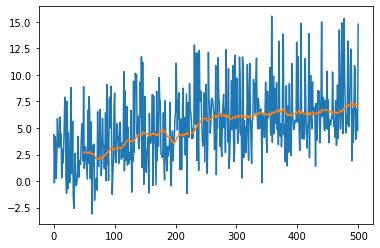

Episode: 510 epsilon: 0.11228563549701923
Episode: 520 epsilon: 0.107559457915009
Episode: 530 epsilon: 0.10303220831196792
Episode: 540 epsilon: 0.09869551367606369
Episode: 550 epsilon: 0.09454135342113795


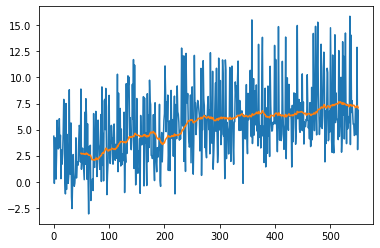

Episode: 560 epsilon: 0.09056204455287445
Episode: 570 epsilon: 0.08675022745933204
Episode: 580 epsilon: 0.08309885229956374
Episode: 590 epsilon: 0.07960116596514924
Episode: 600 epsilon: 0.07625069959052229


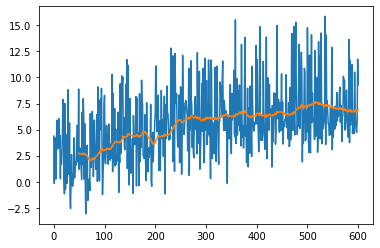

Episode: 610 epsilon: 0.07304125658900062
Episode: 620 epsilon: 0.06996690119238395
Episode: 630 epsilon: 0.06702194747293001
Episode: 640 epsilon: 0.06420094882740288
Episode: 650 epsilon: 0.0614986879037436


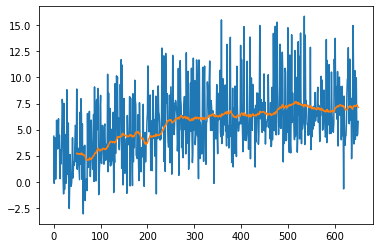

Episode: 660 epsilon: 0.05891016695173428
Episode: 670 epsilon: 0.05643059857981053
Episode: 680 epsilon: 0.05405539690092427
Episode: 690 epsilon: 0.051780169051084124
Episode: 700 epsilon: 0.049600707064885216


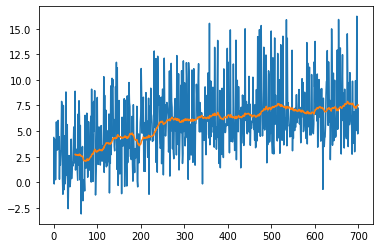

Episode: 710 epsilon: 0.04751298009300428
Episode: 720 epsilon: 0.045513126947264976
Episode: 730 epsilon: 0.043597448959486536
Episode: 740 epsilon: 0.04176240314090865
Episode: 750 epsilon: 0.0400045956295402


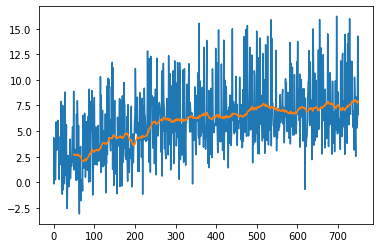

Episode: 760 epsilon: 0.03832077541331378
Episode: 770 epsilon: 0.036707828317436506
Episode: 780 epsilon: 0.035162771244817856
Episode: 790 epsilon: 0.033682746658921174
Episode: 800 epsilon: 0.032265017298836234


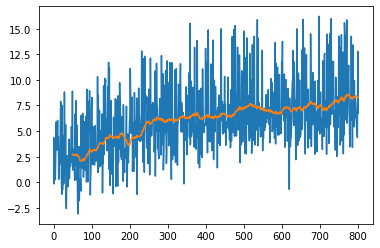

Episode: 810 epsilon: 0.030906961116796926
Episode: 820 epsilon: 0.02960606642878365
Episode: 830 epsilon: 0.028359927269238718
Episode: 840 epsilon: 0.027166238941305806
Episode: 850 epsilon: 0.026022793754362495


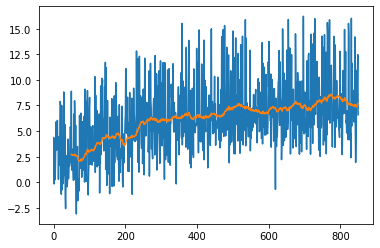

Episode: 860 epsilon: 0.024927476940962916
Episode: 870 epsilon: 0.02387826274563886
Episode: 880 epsilon: 0.02287321067832622
Episode: 890 epsilon: 0.021910461925487082
Episode: 900 epsilon: 0.020988235912289925


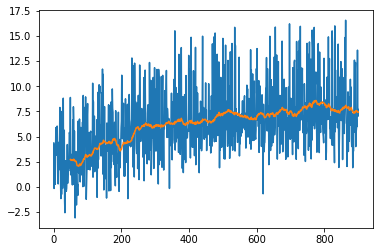

Episode: 910 epsilon: 0.020104827009490085
Episode: 920 epsilon: 0.019258601378919812
Episode: 930 epsilon: 0.018447993951753932
Episode: 940 epsilon: 0.017671505533962
Episode: 950 epsilon: 0.016927700033594142


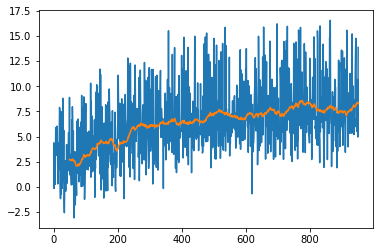

Episode: 960 epsilon: 0.01621520180477221
Episode: 970 epsilon: 0.015532693103474243
Episode: 980 epsilon: 0.01487891165040641
Episode: 990 epsilon: 0.014252648296455585
Episode: 1000 epsilon: 0.013652744786404457


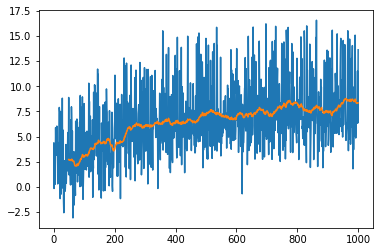

Episode: 1010 epsilon: 0.013078091616773296
Episode: 1020 epsilon: 0.012527625983826755
Episode: 1030 epsilon: 0.012000329817950373
Episode: 1040 epsilon: 0.011495227900761405
Episode: 1050 epsilon: 0.011011386061471829


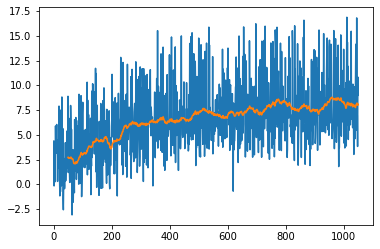

Episode: 1060 epsilon: 0.010547909449167578
Episode: 1070 epsilon: 0.01010394087780874
Episode: 1080 epsilon: 0.01
Episode: 1090 epsilon: 0.01
Episode: 1100 epsilon: 0.01


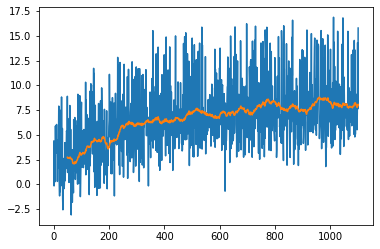

Episode: 1110 epsilon: 0.01
Episode: 1120 epsilon: 0.01
Episode: 1130 epsilon: 0.01
Episode: 1140 epsilon: 0.01
Episode: 1150 epsilon: 0.01


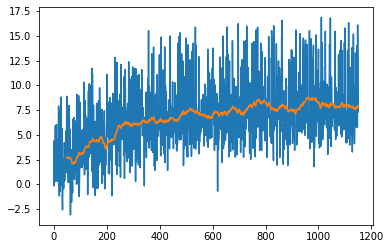

Episode: 1160 epsilon: 0.01
Episode: 1170 epsilon: 0.01
Episode: 1180 epsilon: 0.01
Episode: 1190 epsilon: 0.01
Episode: 1200 epsilon: 0.01


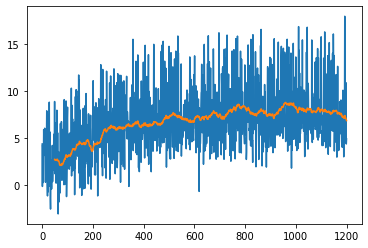

Episode: 1210 epsilon: 0.01
Episode: 1220 epsilon: 0.01
Episode: 1230 epsilon: 0.01
Episode: 1240 epsilon: 0.01
Episode: 1250 epsilon: 0.01


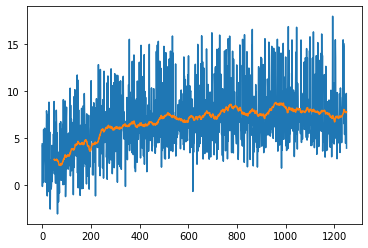

Episode: 1260 epsilon: 0.01
Episode: 1270 epsilon: 0.01
Episode: 1280 epsilon: 0.01
Episode: 1290 epsilon: 0.01
Episode: 1300 epsilon: 0.01


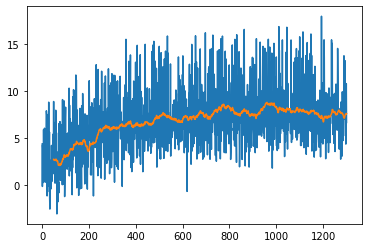

Episode: 1310 epsilon: 0.01
Episode: 1320 epsilon: 0.01
Episode: 1330 epsilon: 0.01
Episode: 1340 epsilon: 0.01
Episode: 1350 epsilon: 0.01


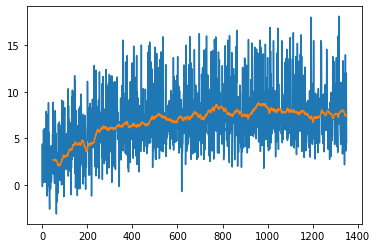

Episode: 1360 epsilon: 0.01
Episode: 1370 epsilon: 0.01
Episode: 1380 epsilon: 0.01
Episode: 1390 epsilon: 0.01
Episode: 1400 epsilon: 0.01


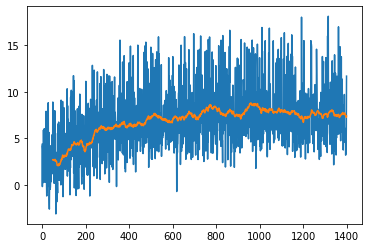

Episode: 1410 epsilon: 0.01
Episode: 1420 epsilon: 0.01
Episode: 1430 epsilon: 0.01
Episode: 1440 epsilon: 0.01
Episode: 1450 epsilon: 0.01


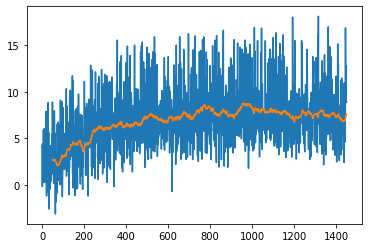

Episode: 1460 epsilon: 0.01
Episode: 1470 epsilon: 0.01
Episode: 1480 epsilon: 0.01
Episode: 1490 epsilon: 0.01
Episode: 1500 epsilon: 0.01


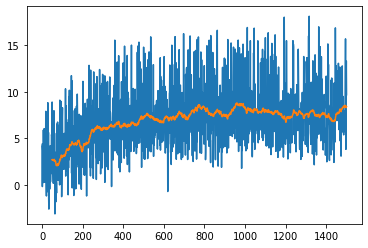

Episode: 1510 epsilon: 0.01
Episode: 1520 epsilon: 0.01
Episode: 1530 epsilon: 0.01
Episode: 1540 epsilon: 0.01
Episode: 1550 epsilon: 0.01


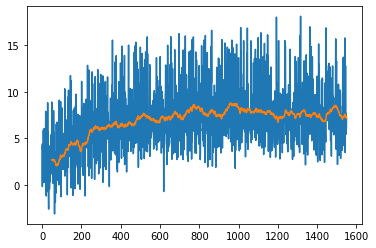

Episode: 1560 epsilon: 0.01
Episode: 1570 epsilon: 0.01
Episode: 1580 epsilon: 0.01
Episode: 1590 epsilon: 0.01
Episode: 1600 epsilon: 0.01


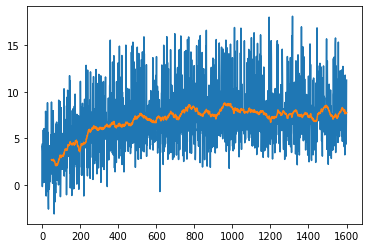

Episode: 1610 epsilon: 0.01
Episode: 1620 epsilon: 0.01
Episode: 1630 epsilon: 0.01
Episode: 1640 epsilon: 0.01
Episode: 1650 epsilon: 0.01


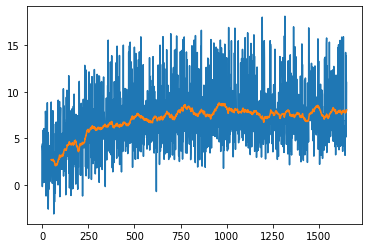

Episode: 1660 epsilon: 0.01
Episode: 1670 epsilon: 0.01
Episode: 1680 epsilon: 0.01
Episode: 1690 epsilon: 0.01
Episode: 1700 epsilon: 0.01


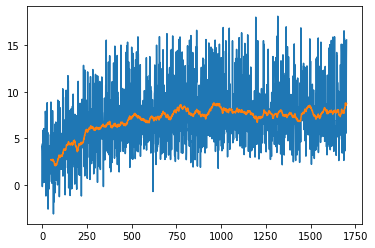

Episode: 1710 epsilon: 0.01
Episode: 1720 epsilon: 0.01
Episode: 1730 epsilon: 0.01
Episode: 1740 epsilon: 0.01
Episode: 1750 epsilon: 0.01


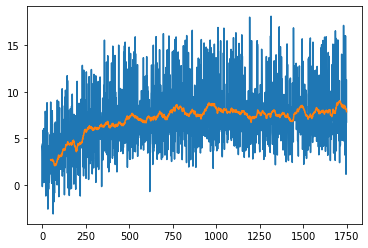

Episode: 1760 epsilon: 0.01
Episode: 1770 epsilon: 0.01
Episode: 1780 epsilon: 0.01
Episode: 1790 epsilon: 0.01
Episode: 1800 epsilon: 0.01


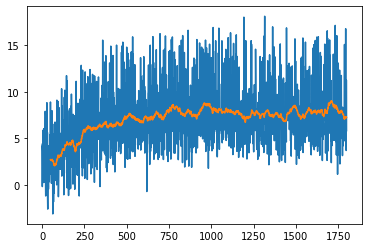

Episode: 1810 epsilon: 0.01
Episode: 1820 epsilon: 0.01
Episode: 1830 epsilon: 0.01
Episode: 1840 epsilon: 0.01
Episode: 1850 epsilon: 0.01


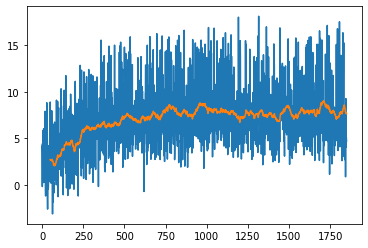

Episode: 1860 epsilon: 0.01
Episode: 1870 epsilon: 0.01
Episode: 1880 epsilon: 0.01
Episode: 1890 epsilon: 0.01
Episode: 1900 epsilon: 0.01


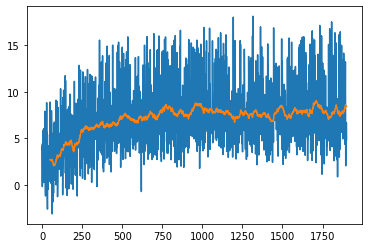

Episode: 1910 epsilon: 0.01
Episode: 1920 epsilon: 0.01
Episode: 1930 epsilon: 0.01
Episode: 1940 epsilon: 0.01
Episode: 1950 epsilon: 0.01


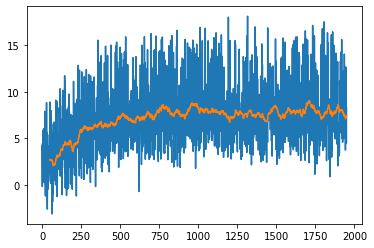

Episode: 1960 epsilon: 0.01
Episode: 1970 epsilon: 0.01
Episode: 1980 epsilon: 0.01
Episode: 1990 epsilon: 0.01
Episode: 2000 epsilon: 0.01


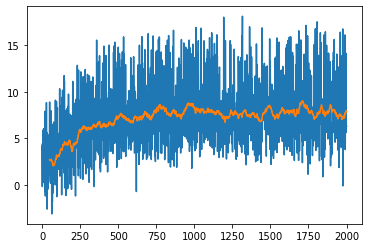

Episode: 2010 epsilon: 0.01
Episode: 2020 epsilon: 0.01
Episode: 2030 epsilon: 0.01
Episode: 2040 epsilon: 0.01
Episode: 2050 epsilon: 0.01


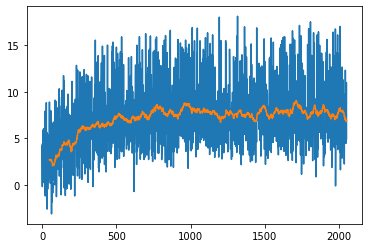

Episode: 2060 epsilon: 0.01
Episode: 2070 epsilon: 0.01
Episode: 2080 epsilon: 0.01
Episode: 2090 epsilon: 0.01
Episode: 2100 epsilon: 0.01


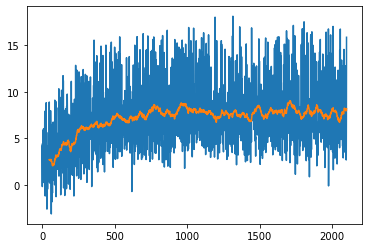

Episode: 2110 epsilon: 0.01
Episode: 2120 epsilon: 0.01
Episode: 2130 epsilon: 0.01
Episode: 2140 epsilon: 0.01
Episode: 2150 epsilon: 0.01


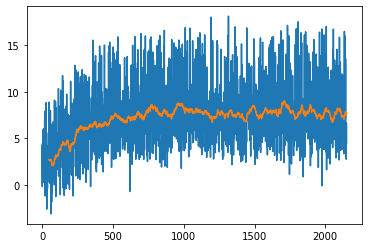

Episode: 2160 epsilon: 0.01
Episode: 2170 epsilon: 0.01
Episode: 2180 epsilon: 0.01
Episode: 2190 epsilon: 0.01
Episode: 2200 epsilon: 0.01


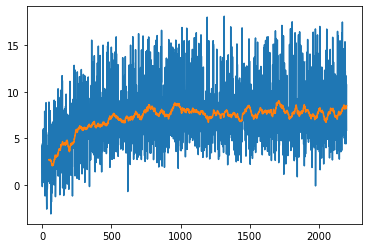

Episode: 2210 epsilon: 0.01
Episode: 2220 epsilon: 0.01
Episode: 2230 epsilon: 0.01
Episode: 2240 epsilon: 0.01
Episode: 2250 epsilon: 0.01


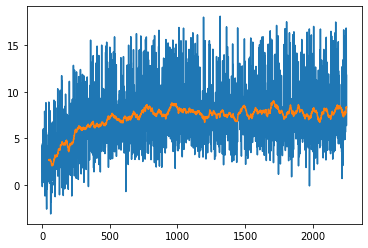

Episode: 2260 epsilon: 0.01
Episode: 2270 epsilon: 0.01
Episode: 2280 epsilon: 0.01
Episode: 2290 epsilon: 0.01
Episode: 2300 epsilon: 0.01


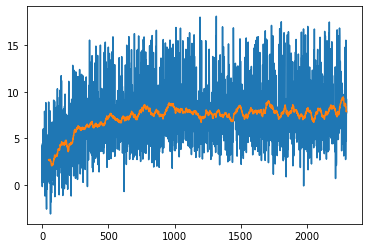

Episode: 2310 epsilon: 0.01
Episode: 2320 epsilon: 0.01
Episode: 2330 epsilon: 0.01
Episode: 2340 epsilon: 0.01
Episode: 2350 epsilon: 0.01


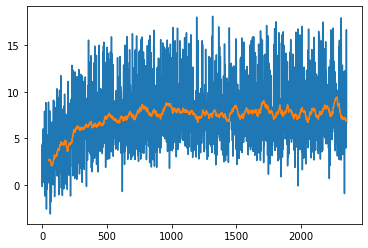

Episode: 2360 epsilon: 0.01
Episode: 2370 epsilon: 0.01
Episode: 2380 epsilon: 0.01
Episode: 2390 epsilon: 0.01
Episode: 2400 epsilon: 0.01


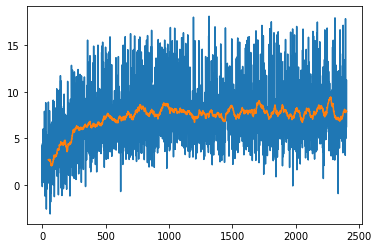

Episode: 2410 epsilon: 0.01
Episode: 2420 epsilon: 0.01
Episode: 2430 epsilon: 0.01
Episode: 2440 epsilon: 0.01
Episode: 2450 epsilon: 0.01


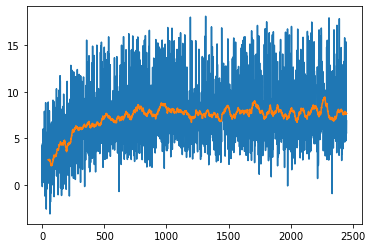

Episode: 2460 epsilon: 0.01
Episode: 2470 epsilon: 0.01
Episode: 2480 epsilon: 0.01
Episode: 2490 epsilon: 0.01
Episode: 2500 epsilon: 0.01


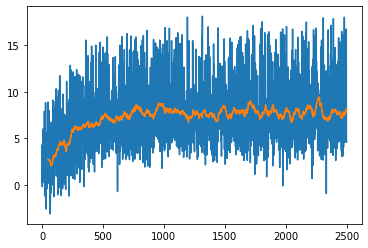

Episode: 2510 epsilon: 0.01
Episode: 2520 epsilon: 0.01
Episode: 2530 epsilon: 0.01
Episode: 2540 epsilon: 0.01
Episode: 2550 epsilon: 0.01


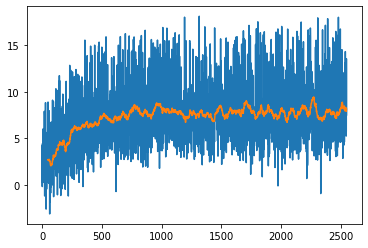

Episode: 2560 epsilon: 0.01
Episode: 2570 epsilon: 0.01
Episode: 2580 epsilon: 0.01
Episode: 2590 epsilon: 0.01
Episode: 2600 epsilon: 0.01


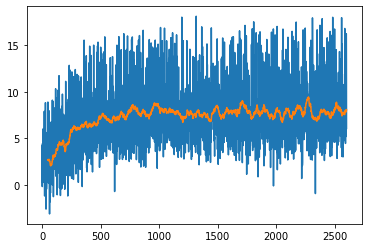

Episode: 2610 epsilon: 0.01
Episode: 2620 epsilon: 0.01
Episode: 2630 epsilon: 0.01
Episode: 2640 epsilon: 0.01
Episode: 2650 epsilon: 0.01


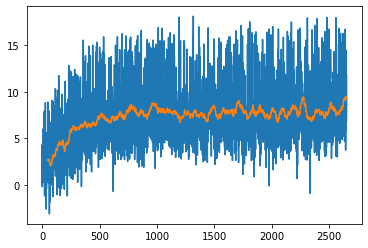

Episode: 2660 epsilon: 0.01
Episode: 2670 epsilon: 0.01
Episode: 2680 epsilon: 0.01
Episode: 2690 epsilon: 0.01
Episode: 2700 epsilon: 0.01


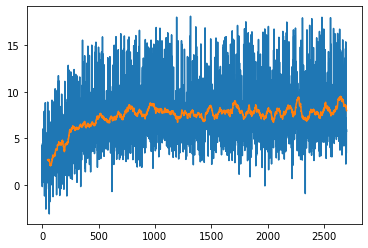

Episode: 2710 epsilon: 0.01
Episode: 2720 epsilon: 0.01
Episode: 2730 epsilon: 0.01
Episode: 2740 epsilon: 0.01
Episode: 2750 epsilon: 0.01


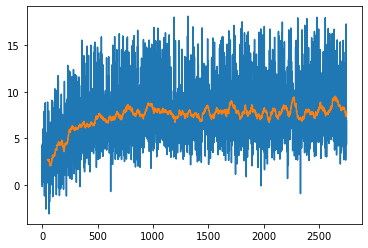

Episode: 2760 epsilon: 0.01
Episode: 2770 epsilon: 0.01
Episode: 2780 epsilon: 0.01
Episode: 2790 epsilon: 0.01
Episode: 2800 epsilon: 0.01


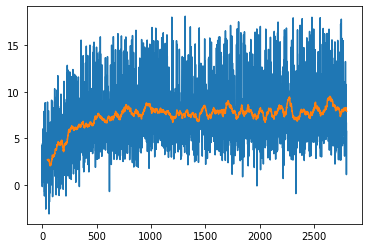

Episode: 2810 epsilon: 0.01
Episode: 2820 epsilon: 0.01
Episode: 2830 epsilon: 0.01
Episode: 2840 epsilon: 0.01
Episode: 2850 epsilon: 0.01


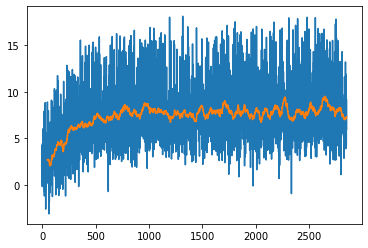

Episode: 2860 epsilon: 0.01
Episode: 2870 epsilon: 0.01
Episode: 2880 epsilon: 0.01
Episode: 2890 epsilon: 0.01
Episode: 2900 epsilon: 0.01


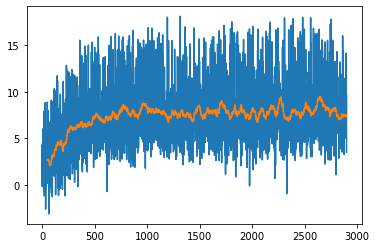

Episode: 2910 epsilon: 0.01
Episode: 2920 epsilon: 0.01
Episode: 2930 epsilon: 0.01
Episode: 2940 epsilon: 0.01
Episode: 2950 epsilon: 0.01


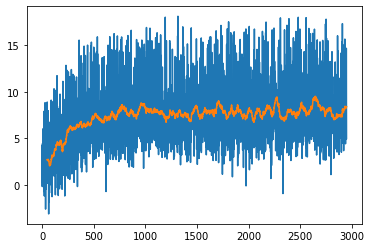

Episode: 2960 epsilon: 0.01
Episode: 2970 epsilon: 0.01
Episode: 2980 epsilon: 0.01
Episode: 2990 epsilon: 0.01


In [9]:
results = list()
total_score = list()

for episode in range(N_EPISODES):
    if episode % 10 == 0:
        print('Episode:', episode, 'epsilon:', agent.epsilon)
    beta_L = draw_beta_L()
    #beta_L = 2.0
    state = env.reset(parameters={'beta_L': beta_L})
    
    done, G = False, 0
    while done is False:
        
        action = agent.choose_action(state)
        _action = transform_action(action)
        new_state, reward, done, info = env.step(_action)
        scaled_reward = reward_scaler(reward, beta_L)
        
        agent.remember(state, action, scaled_reward, new_state, int(done))
        state = new_state
        agent.learn()
        
        G += scaled_reward
        results.append(create_return_array(state, _action, scaled_reward, episode))
    
    total_score.append(G)
    
    if episode % 50 == 0:
        plt.plot(total_score)
        plt.plot(pd.Series(total_score).rolling(50).mean())
        plt.show()

In [10]:
agent.save_model('models//dqn_model')
agent.load_model('models//dqn_model')

In [11]:
total_score_name = 'total_score_dqn_simple_model'
with open(f'..//data//{total_score_name}.pkl', 'wb') as f:
    pickle.dump(total_score, f)

In [12]:
cols = ['Q', 'G', 'K', 'Z', 'beta_L', 'action', 'reward', 'episode']
df = pd.DataFrame(results, columns = cols)

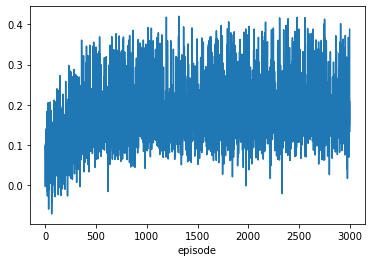

In [13]:
df.groupby('episode').mean()['reward'].plot()


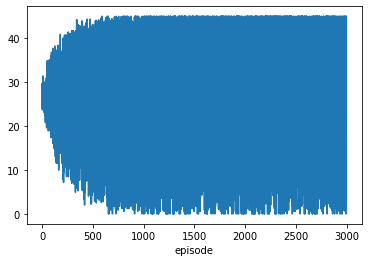

In [14]:
df.groupby('episode').mean()['action'].plot()

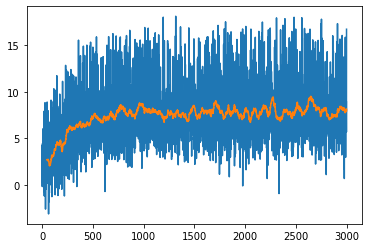

In [15]:
plt.plot(total_score)
plt.plot(pd.Series(total_score).rolling(50).mean())

Episode: 0


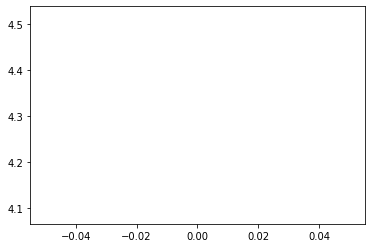

Episode: 10
Episode: 20
Episode: 30
Episode: 40
Episode: 50


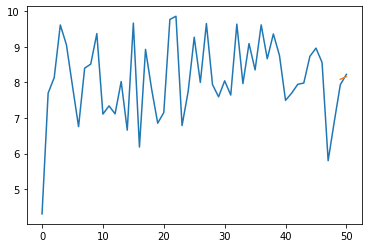

Episode: 60
Episode: 70
Episode: 80
Episode: 90
Episode: 100


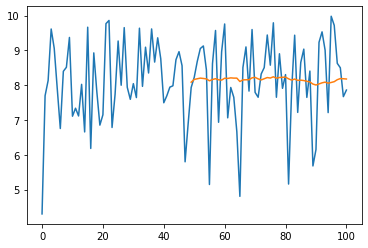

Episode: 110
Episode: 120
Episode: 130
Episode: 140
Episode: 150


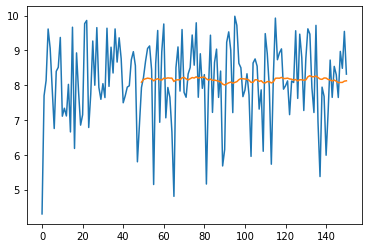

Episode: 160
Episode: 170
Episode: 180
Episode: 190


In [16]:
results_sim = list()
total_score_sim = list()

for episode in range(200):
    if episode % 10 == 0:
        print('Episode:', episode)
    beta_L = 4
    state = env.reset(parameters={'beta_L': beta_L})
    
    done, G = False, 0
    while done is False:
        
        action = agent.choose_action(state)
        _action = transform_action(action)
        new_state, reward, done, info = env.step(_action)
        scaled_reward = reward_scaler(reward, beta_L)
        agent.epsilon = 0.0
        state = new_state
        
        G += scaled_reward
        results_sim.append(create_return_array(state, _action, scaled_reward, episode))
    
    total_score_sim.append(G)
    
    if episode % 50 == 0:
        plt.plot(total_score_sim)
        plt.plot(pd.Series(total_score_sim).rolling(50).mean())
        plt.show()

In [17]:
cols = ['Q', 'G', 'K', 'Z', 'beta_L', 'action', 'reward', 'episode']
df_sim = pd.DataFrame(results_sim, columns = cols)

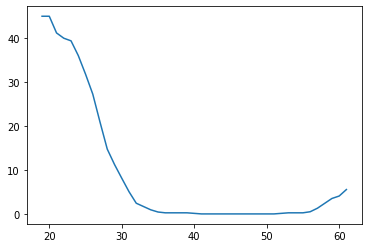

In [18]:
plt.plot(df_sim.groupby('Q').mean()['action'])

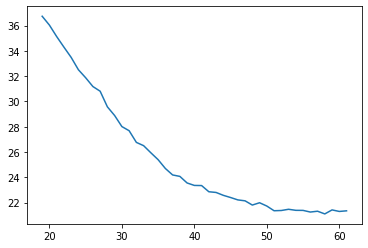

In [19]:
plt.plot(df.groupby('Q').mean()['action'])

In [20]:
np.mean(total_score[-1500:-1])

7.885530727791986

7.922859107956146


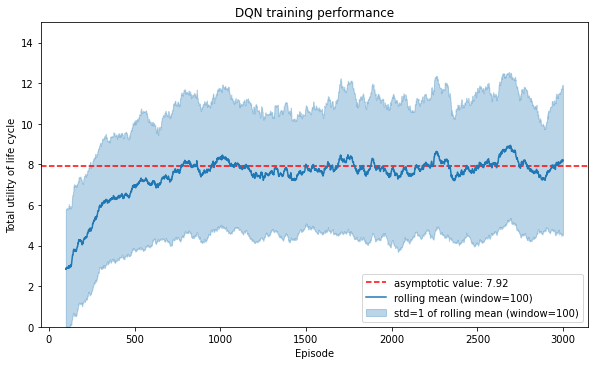

In [26]:
title, fig_scale = 'DQN training performance', 0.7

s = pd.Series(total_score)
f, ax = plt.subplots(1,1, figsize=(14* fig_scale, 8 * fig_scale))
ax.set_ylim(0, 15)

asymp = s.loc[2000: 3000].mean()
ax.axhline(y=asymp, color='red', ls='--', label=f'asymptotic value: {asymp:.2f}')
mean = s.rolling(100).mean()
std = s.rolling(100).std()
ax.fill_between(s.index, mean - std, mean + std, alpha=0.3, color='C0', label='std=1 of rolling mean (window=100)')
ax.plot(mean, label='rolling mean (window=100)')

ax.set_xlabel('Episode')
ax.set_ylabel('Total utility of life cycle')

ax.legend(loc='lower right')
ax.set_title(title)
print(asymp)

f.savefig('..//figures//dqn_training_performance_simple_model')